In [1]:
import pandas as pd
import os
import matplotlib as plt

variablesKey = 'Validators'
variablesSplit = 'l2_relative_error_'
validatorsRename = ['0.75','0.85','1.0']
variablesID = 'validator'
subfolders = ['baseline','SGM_SPADE','test']
# run aggregates with these subfoldetrs
folder = 'C:/Users/jacec/Documents/Test_Runs/'
aggregates = [folder+f+'/aggregates/' for f in os.listdir(folder) if os.path.isdir(folder+f)]
#all results will be in /aggregates, separated by tags from subfolders
#find all validation files separated by subfolder
files = []
#for i in aggregates:
#    csvs_by_testcase = [[i + g for g in os.listdir(i) if (g.endswith('.csv')) and (variablesKey in g) and (f in g)] for f in subfolders]
#    files = files+[i for i in csvs_by_testcase if i]
files = [[i+g for g in os.listdir(i) if g.endswith('.csv') and (variablesKey in g)] for i in aggregates]
#files = [[aggregates + g for g in os.listdir(aggregates) if ('.csv' in g) and (f in g)] for f in subfolders] 
#list of lists of the files for each individual aggregation
#Go through sub-list, load into dataframes with descriptive columns
#Find unique variables, create sub-frames with them in a format for plotting



In [2]:
files

[['C:/Users/jacec/Documents/Test_Runs/512x16000/aggregates/Validatorsvalidatorl2_relative_error_p-SGM_SPADE-512x16000.csv',
  'C:/Users/jacec/Documents/Test_Runs/512x16000/aggregates/Validatorsvalidatorl2_relative_error_p-test-512x16000.csv',
  'C:/Users/jacec/Documents/Test_Runs/512x16000/aggregates/Validatorsvalidatorl2_relative_error_u-SGM_SPADE-512x16000.csv',
  'C:/Users/jacec/Documents/Test_Runs/512x16000/aggregates/Validatorsvalidatorl2_relative_error_u-test-512x16000.csv',
  'C:/Users/jacec/Documents/Test_Runs/512x16000/aggregates/Validatorsvalidatorl2_relative_error_v-SGM_SPADE-512x16000.csv',
  'C:/Users/jacec/Documents/Test_Runs/512x16000/aggregates/Validatorsvalidatorl2_relative_error_v-test-512x16000.csv',
  'C:/Users/jacec/Documents/Test_Runs/512x16000/aggregates/Validatorsvalidator_2l2_relative_error_p-SGM_SPADE-512x16000.csv',
  'C:/Users/jacec/Documents/Test_Runs/512x16000/aggregates/Validatorsvalidator_2l2_relative_error_p-test-512x16000.csv',
  'C:/Users/jacec/Docume

In [3]:
#each aggregate becomes one dataframe
#extract common variable names (validator, validator_n, uvpvnu)
#load into df with descriptive columns, uses 'subfolder' name, validator name, variable name
dataframes = []
for aggregation in files:
    dfs = []
    for testName in subfolders:
        subtests = [csv for csv in aggregation if testName in csv]
        if not subtests:
            continue
        print(subtests)
        for k,i in enumerate(subtests):
            validatorName = i.split(variablesKey)[1].split(variablesSplit)[0]
            vv = i.split(variablesSplit)[1].split('-'+testName)[0]
            variableName = f'{testName}_{validatorName}_{vv}_'
            print(variableName)
            #df = pd.read_csv(i, index_col = 0, delimiter=';')
            df = pd.read_csv(i, delimiter=';')
            oldcols = df.keys()
            print(oldcols)
            #mapping = {i:variableName+i for i in oldcols[0:-1]}
            mapping = {'Unnamed: 0':variableName+'step'}
            if k == 0:
                mapping.update({'wall_time':testName+'_wall_time'})
            mapping.update({i:variableName+i for i in oldcols[1:-1]})
            print(mapping)
            df.rename(columns=mapping, inplace=True)
            newcols = df.keys()
            print(newcols)
            if k > 0:
                df.drop(columns='wall_time')
            dfs.append(df)
    df = pd.concat(dfs, axis=1)
    df = df.loc[:,~df.columns.duplicated()].copy() #drop duplicates based on column name alone
    #append to dataframes list
    dataframes.append(df)

['C:/Users/jacec/Documents/Test_Runs/512x16000/aggregates/Validatorsvalidatorl2_relative_error_p-SGM_SPADE-512x16000.csv', 'C:/Users/jacec/Documents/Test_Runs/512x16000/aggregates/Validatorsvalidatorl2_relative_error_u-SGM_SPADE-512x16000.csv', 'C:/Users/jacec/Documents/Test_Runs/512x16000/aggregates/Validatorsvalidatorl2_relative_error_v-SGM_SPADE-512x16000.csv', 'C:/Users/jacec/Documents/Test_Runs/512x16000/aggregates/Validatorsvalidator_2l2_relative_error_p-SGM_SPADE-512x16000.csv', 'C:/Users/jacec/Documents/Test_Runs/512x16000/aggregates/Validatorsvalidator_2l2_relative_error_u-SGM_SPADE-512x16000.csv', 'C:/Users/jacec/Documents/Test_Runs/512x16000/aggregates/Validatorsvalidator_2l2_relative_error_v-SGM_SPADE-512x16000.csv', 'C:/Users/jacec/Documents/Test_Runs/512x16000/aggregates/Validatorsvalidator_3l2_relative_error_p-SGM_SPADE-512x16000.csv', 'C:/Users/jacec/Documents/Test_Runs/512x16000/aggregates/Validatorsvalidator_3l2_relative_error_u-SGM_SPADE-512x16000.csv', 'C:/Users/jac

In [4]:
dataframes[0]

,SGM_SPADE_validator_p_step,SGM_SPADE_validator_p_mean,SGM_SPADE_validator_p_amin,SGM_SPADE_validator_p_amax,SGM_SPADE_validator_p_median,SGM_SPADE_validator_p_std,SGM_SPADE_validator_p_var,SGM_SPADE_wall_time,SGM_SPADE_validator_u_step,SGM_SPADE_validator_u_mean,...,test_validator_3_u_median,test_validator_3_u_std,test_validator_3_u_var,test_validator_3_v_step,test_validator_3_v_mean,test_validator_3_v_amin,test_validator_3_v_amax,test_validator_3_v_median,test_validator_3_v_std,test_validator_3_v_var
0,2000,1.190535,1.135371,1.250575,1.185299,0.039745,0.001580,1.694082e+09,2000,1.261131,...,1.213922,0.049938,0.002494,2000,0.759176,0.714561,0.800878,0.760632,0.030573,9.347287e-04
1,4000,1.011563,0.987810,1.044942,1.006069,0.016320,0.000266,1.694082e+09,4000,0.931362,...,0.863326,0.037790,0.001428,4000,0.554855,0.523544,0.570288,0.562793,0.019043,3.626533e-04
2,6000,0.952134,0.876267,1.247621,0.916372,0.114317,0.013068,1.694082e+09,6000,0.872477,...,0.863426,0.456380,0.208282,6000,0.641998,0.461212,0.992232,0.557274,0.213946,4.577270e-02
3,8000,0.980384,0.808816,1.174828,0.953273,0.154890,0.023991,1.694082e+09,8000,0.951925,...,0.742917,0.127866,0.016350,8000,0.488264,0.389462,0.602784,0.480404,0.075844,5.752376e-03
4,9000,1.030357,0.779072,1.214041,1.055199,0.136101,0.018524,1.694082e+09,9000,1.024718,...,0.735888,0.241858,0.058495,9000,0.539569,0.406602,0.798220,0.476728,0.155428,2.415776e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,335000,0.126635,0.119382,0.133546,0.125256,0.004945,0.000024,1.694091e+09,335000,0.048393,...,0.029653,0.002490,0.000006,335000,0.032070,0.031060,0.033559,0.031831,0.000921,8.483036e-07
96,340000,0.126603,0.120031,0.132958,0.125186,0.004725,0.000022,1.694091e+09,340000,0.048441,...,0.029637,0.002478,0.000006,340000,0.032122,0.031123,0.033519,0.031924,0.000872,7.604204e-07
97,343000,0.126679,0.120119,0.133157,0.125281,0.004780,0.000023,1.694092e+09,343000,0.048441,...,0.029647,0.002476,0.000006,343000,0.032106,0.031100,0.033485,0.031919,0.000866,7.501208e-07
98,345000,0.126604,0.119604,0.133416,0.125146,0.004878,0.000024,1.694092e+09,345000,0.048470,...,0.029591,0.002483,0.000006,345000,0.032100,0.031109,0.033542,0.031874,0.000893,7.973885e-07


<Axes: xlabel='SGM_SPADE_validator_v_step'>

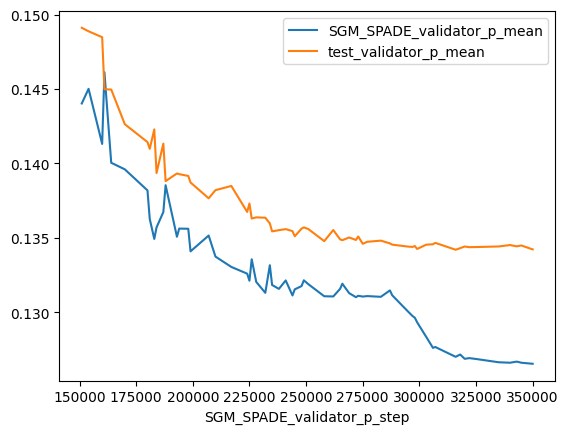

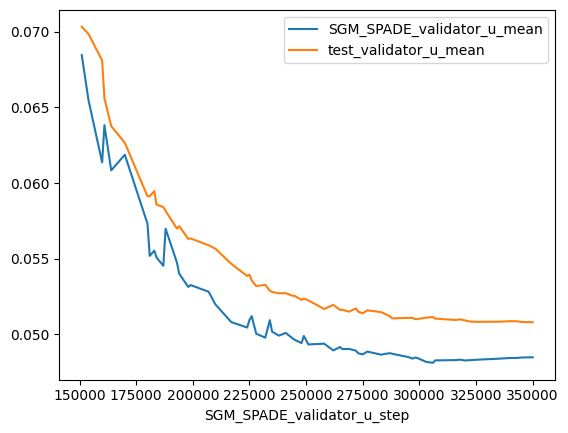

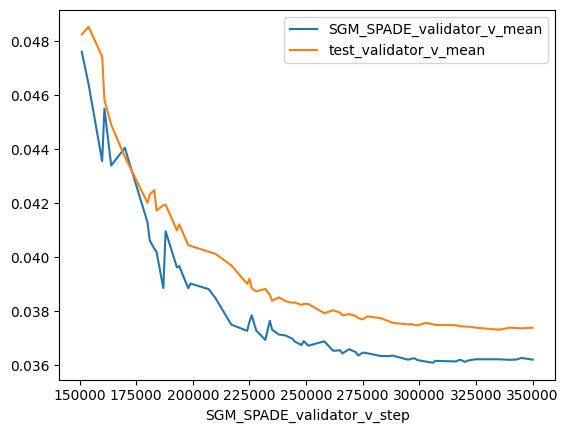

In [5]:
#os.chdir(f"C:\\Users\\John Anticev\\OneDrive - stevens.edu\\SIMNET\\{folder}")
dataframes[0][['SGM_SPADE_validator_p_step','SGM_SPADE_validator_p_mean','test_validator_p_mean']
              ][dataframes[0]['SGM_SPADE_validator_p_step'] >= 150000].plot(x='SGM_SPADE_validator_p_step')
dataframes[0][['SGM_SPADE_validator_u_step','SGM_SPADE_validator_u_mean','test_validator_u_mean']
              ][dataframes[0]['SGM_SPADE_validator_u_step'] >= 150000].plot(x='SGM_SPADE_validator_u_step')
dataframes[0][['SGM_SPADE_validator_v_step','SGM_SPADE_validator_v_mean','test_validator_v_mean']
              ][dataframes[0]['SGM_SPADE_validator_v_step'] >= 150000].plot(x='SGM_SPADE_validator_v_step')


<Axes: xlabel='SGM_SPADE_validator_3_v_step'>

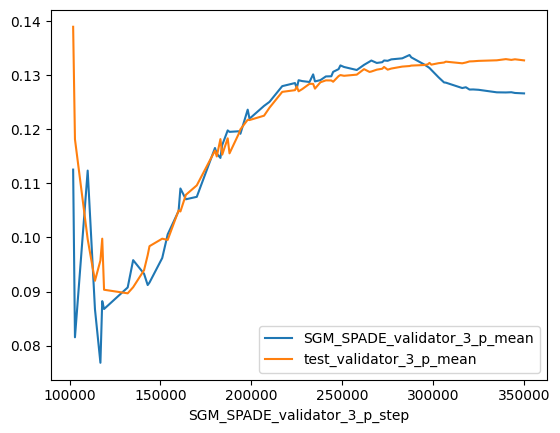

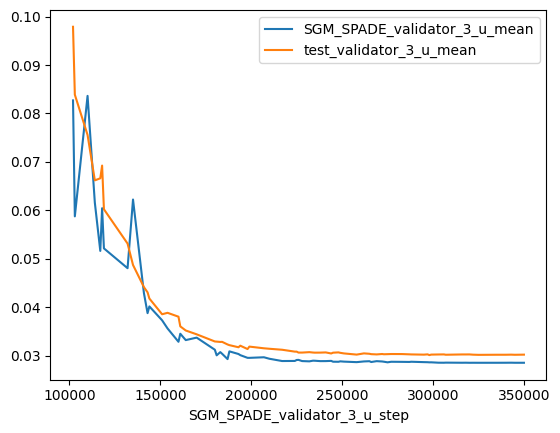

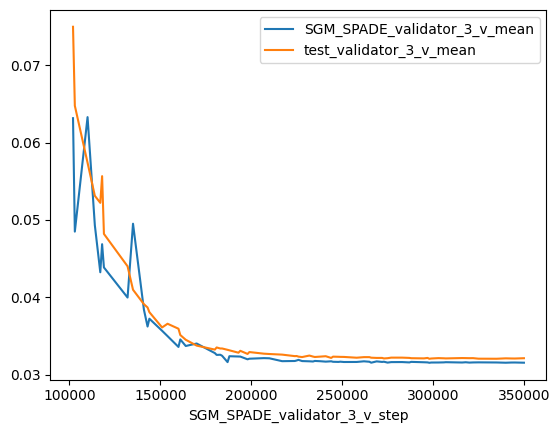

In [6]:
dataframes[0][['SGM_SPADE_validator_3_p_step','SGM_SPADE_validator_3_p_mean','test_validator_3_p_mean']
              ][dataframes[0]['SGM_SPADE_validator_3_p_step'] >= 100000].plot(x='SGM_SPADE_validator_3_p_step')

dataframes[0][['SGM_SPADE_validator_3_u_step','SGM_SPADE_validator_3_u_mean','test_validator_3_u_mean']
              ][dataframes[0]['SGM_SPADE_validator_3_u_step'] >= 100000].plot(x='SGM_SPADE_validator_3_u_step')

dataframes[0][['SGM_SPADE_validator_3_v_step','SGM_SPADE_validator_3_v_mean','test_validator_3_v_mean']
              ][dataframes[0]['SGM_SPADE_validator_3_v_step'] >= 100000].plot(x='SGM_SPADE_validator_3_v_step')

<Axes: xlabel='SGM_SPADE_validator_2_v_step'>

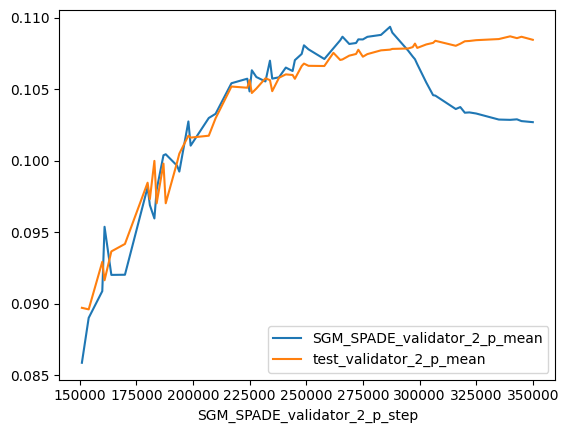

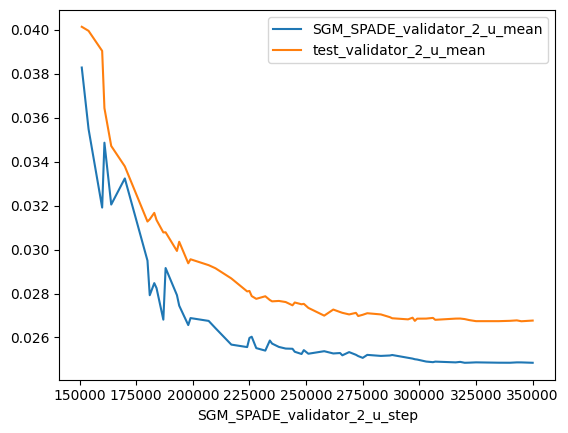

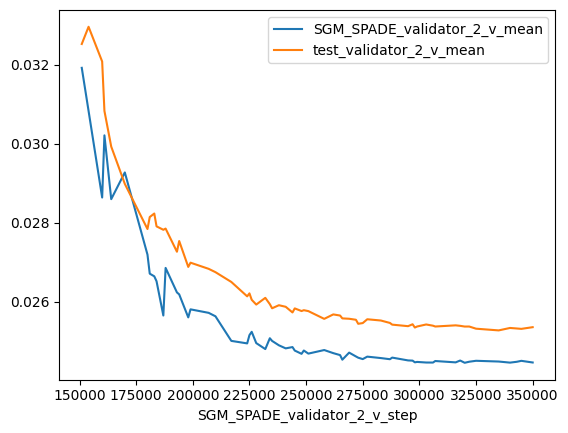

In [7]:
dataframes[0][['SGM_SPADE_validator_2_p_step','SGM_SPADE_validator_2_p_mean','test_validator_2_p_mean']
              ][dataframes[0]['SGM_SPADE_validator_3_p_step'] >= 150000].plot(x='SGM_SPADE_validator_2_p_step')

dataframes[0][['SGM_SPADE_validator_2_u_step','SGM_SPADE_validator_2_u_mean','test_validator_2_u_mean']
              ][dataframes[0]['SGM_SPADE_validator_2_u_step'] >= 150000].plot(x='SGM_SPADE_validator_2_u_step')

dataframes[0][['SGM_SPADE_validator_2_v_step','SGM_SPADE_validator_2_v_mean','test_validator_2_v_mean']
              ][dataframes[0]['SGM_SPADE_validator_2_v_step'] >= 150000].plot(x='SGM_SPADE_validator_2_v_step')

In [36]:
#save new DF for convenience
#new_df.to_csv(f'C:\\Users\\John Anticev\\OneDrive - stevens.edu\\SIMNET\\{folder}\\output.csv')
import matplotlib.pyplot as plt
rawdat = dataframes[0][['SGM_SPADE_validator_2_p_step','SGM_SPADE_wall_time','test_wall_time',
                        'SGM_SPADE_validator_2_p_mean','test_validator_2_p_mean']
              ][dataframes[0]['SGM_SPADE_validator_2_p_step'] >= 150000]
rawdat.loc[:,'SGM_SPADE_wall_time'] = (rawdat.loc[:,'SGM_SPADE_wall_time'] - rawdat.loc[0,'SGM_SPADE_wall_time'])/60/60
rawdat.loc[:,'test_wall_time'] = (rawdat.loc[:,'test_wall_time'] - rawdat.loc[0,'test_wall_time'])/60/60
#.plot(x='SGM_SPADE_validator_2_p_step', y = 'SGM_SPADE_validator_2_p_mean')

#[dataframes[0]['SGM_SPADE_validator_3_p_step'] >= 150000]

ax = rawdat.plot(x='SGM_SPADE_wall_time', y = 'SGM_SPADE_validator_2_p_mean')
rawdat.plot(x='test_wall_time', y = 'test_validator_2_p_mean', ax=ax)
plt.show()

KeyError: 0